[0 1]
0    148730
1      6398
Name: Cluster, dtype: int64
var by all 90 PCA =  99.99999999999999


<Axes: >

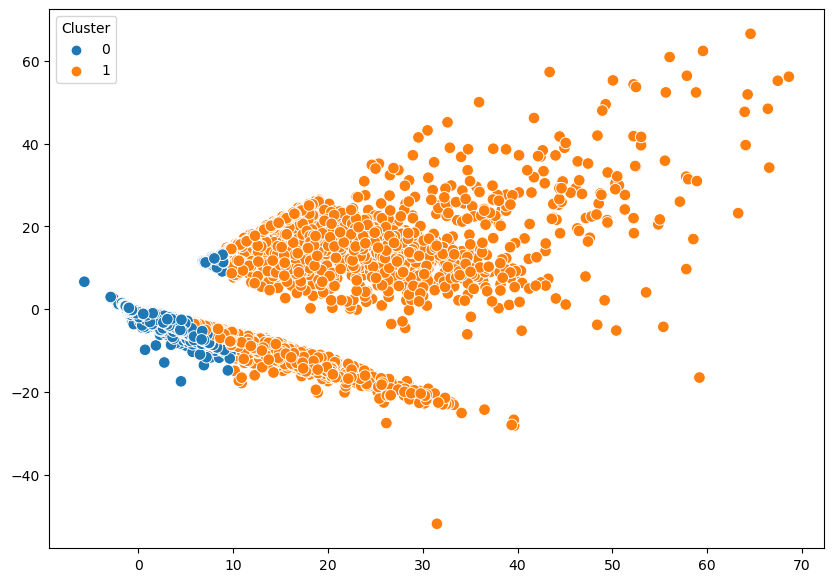

In [28]:
#clustering KMeans
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")



df = pd.read_csv('processed_data.csv')

X = df.iloc[:, 1:].values
scaler = StandardScaler(); X = scaler.fit_transform(X)

num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
df['Cluster'] = labels


#df.to_csv('data.csv', index=False)


unique_values = df['Cluster'].unique()
print(unique_values)

value_counts = df['Cluster'].value_counts()
print(value_counts)

#class_3_observations = df[df['Cluster'] == 3]
#print(class_3_observations)

pca_90 = PCA(n_components = 90, random_state=5)
pca_90.fit(X)
X_pca_90 = pca_90.transform(X)

print('var by all 90 PCA = ', sum(pca_90.explained_variance_ratio_*100))


pca_2 = PCA(n_components = 2, random_state=5)
pca_2.fit(X)
X_pca_2 = pca_2.transform(X)


plt.figure(figsize=(10,7))
sns.scatterplot(x=X_pca_2[:,0],y=X_pca_2[:,1],s=70,hue=df['Cluster'])

In [25]:
X.shape

(155128, 90)

In [27]:
#clustering DBSCAN
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('processed_data.csv')

X = df.iloc[:, 1:].values
scaler = StandardScaler(); X = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=5, p=None, n_jobs=None)
dbscan.fit(X)
labels = dbscan.labels_
df['Cluster'] = labels

"""
df.to_csv('data.csv', index=False
"""
unique_values = df['Cluster'].unique()
print(unique_values)

value_counts = df['Cluster'].value_counts()
print(value_counts)

pca = PCA(n_components=2)
pca.fit(X)
X.shape



[  0   1   2  -1   3   4   5   6   7   8   9  10 123  11  12  13  14  15
  16  17  18  19  20  21  79  47  22  23  24  25  26  27  28  29  30  31
  32  33  34  35  36  37  38  53  39  40  41 177  42  43 140  44 105  88
  45  46 176  48  49  64  50 146 173  51 107 117  52  54  55  56  57  58
  59  60  61 136  62  63  89  65  66 160  67  68  69 159  70  71  72  73
  74  75  76  77  78  83  80 152  81  82 151  84 129  85 133  86  87 164
 158  90  91 172  92 166  93  94  95 138  96  97  98  99 100 101 127 126
 165 168 102 169 103 139 104 112 132 106 119 122 153 148 147 108 109 155
 110 170 131 111 171 113 135 128 114 115 116 118 121 163 149 120 141 124
 125 144 154 162 130 134 156 175 167 137 142 174 143 145 161 150 157 178]
 1      34739
-1      33547
 2      22889
 3      10458
 7       6753
        ...  
 94         4
 107        4
 36         3
 161        3
 171        3
Name: Cluster, Length: 180, dtype: int64


(155128, 90)